# Prueba Con sma

In [1]:
from __future__ import print_function

import sma_crossover
from pyalgotrade import plotter
from pyalgotrade.tools import quandl
from pyalgotrade.stratanalyzer import sharpe
import matplotlib.pyplot as plt

In [2]:
plt.style.use("seaborn-dark")

Sharpe ratio: 1.07


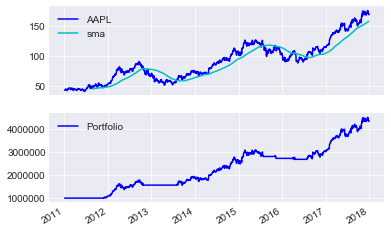

In [7]:
def main(plot):
    instrument = "AAPL"
    smaPeriod = 163

    # Download the bars.
    feed = quandl.build_feed("WIKI", [instrument], 2011, 2017, ".")

    strat = sma_crossover.SMACrossOver(feed, instrument, smaPeriod)
    sharpeRatioAnalyzer = sharpe.SharpeRatio()
    strat.attachAnalyzer(sharpeRatioAnalyzer)

    if plot:
        plt = plotter.StrategyPlotter(strat, True, False, True)
        plt.getInstrumentSubplot(instrument).addDataSeries("sma", strat.getSMA())

    strat.run()
    print("Sharpe ratio: %.2f" % sharpeRatioAnalyzer.getSharpeRatio(0.05))

    if plot:
        plt.plot()


if __name__ == "__main__":
    main(True)